## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### Avaliação de Agrupamento de Dados - Demo 3

* Utilização do algoritmo K-means com diferentes parâmetros.
* Base de dados sintéticas
* Comparações das diferentes execuções usando índice de avaliação interno.

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets.samples_generator import make_blobs

from sklearn.metrics import silhouette_score

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Criar base de dados sintética

In [3]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,7.415416,-5.293543,2
1,-3.898435,-0.410129,0
2,-6.065070,-0.514075,0
3,-7.980452,8.115292,3
4,10.479860,-0.900095,5


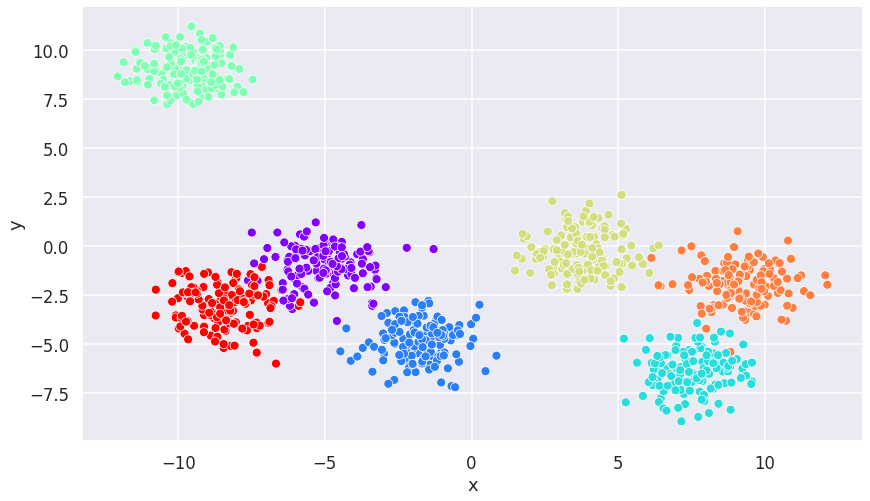

In [4]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### Testar K-Means

In [5]:
def train_and_plot(data, k=3, init='k-means++', n_init=10, max_iter=300,
                   precompute_distances='auto', algorithm='auto', verbose=0, random_state=133):
    # Copiamos os dados e removemos a coluna label 
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter,
                   precompute_distances=precompute_distances, algorithm=algorithm,
                   random_state=random_state, verbose=verbose)
    model.fit(data_copy)
    
    data_copy['cluster_labels'] = model.labels_
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

    centroids = model.cluster_centers_
    centroids_x = centroids[:,0]
    centroids_y = centroids[:,1]

    _ = plt.scatter(centroids_x, centroids_y, color='black', s=100)
    
    return model, model.labels_

### Exemplo de Índice Interno

#### Silhouette Coefficient

Com número correto de clusters, onde grupos resultantes são bastante similares ao ground truth.

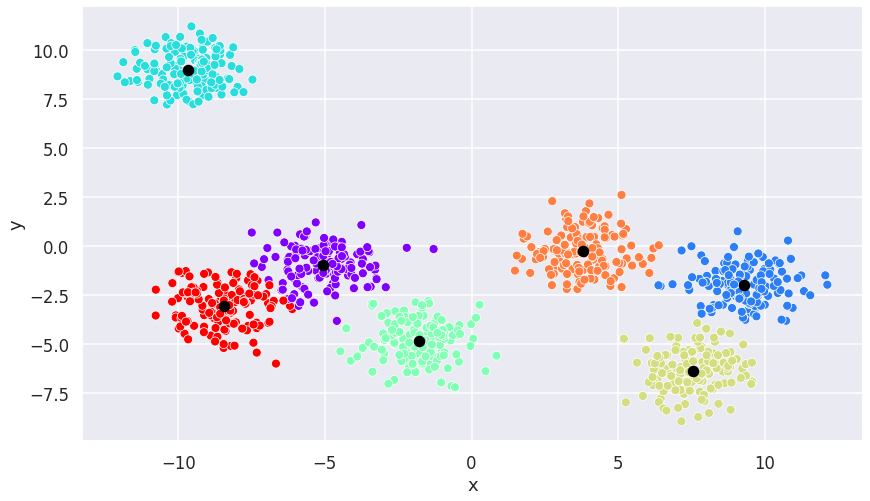

In [6]:
_, clusters_labels = train_and_plot(df, k=7)

In [7]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.65


Com inicialização aleatória, onde grupos resultantes são menos similares ao ground truth.

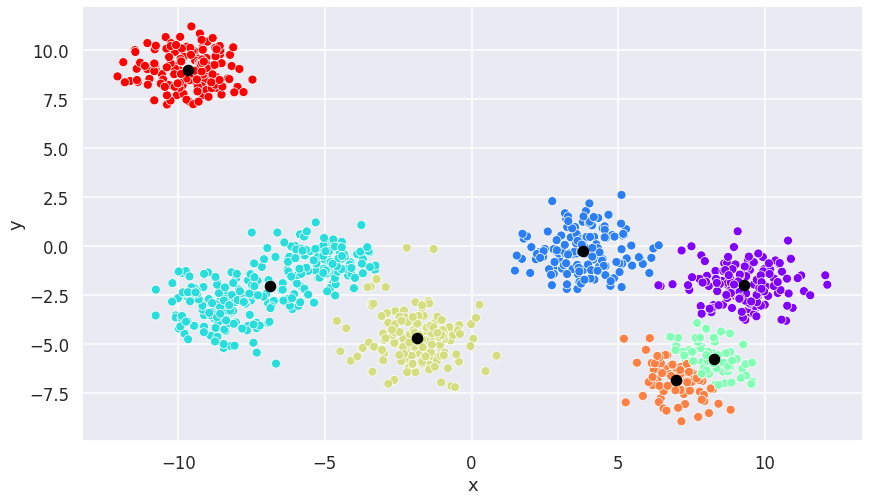

In [8]:
_, clusters_labels = train_and_plot(df, k=7, init='random')

In [9]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.59


Com número de grupos incorreto, onde a quantidade de grupos resultantes é menor do que a quantidade de grupos real.

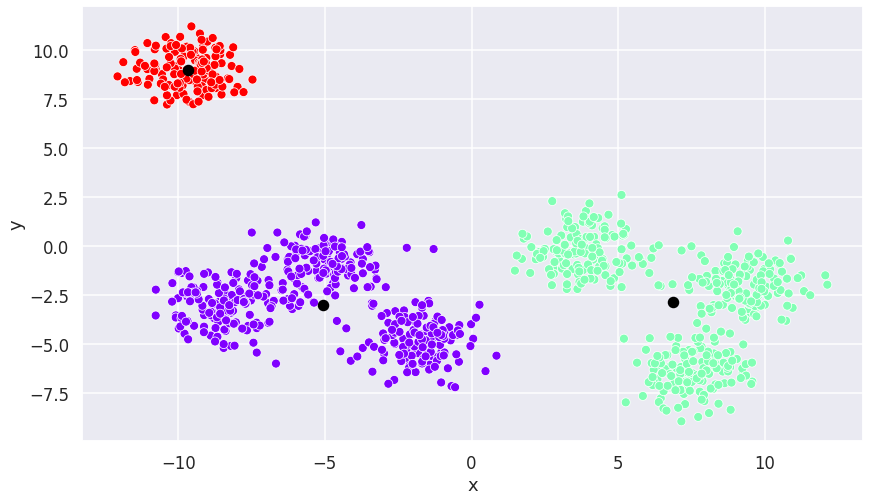

In [10]:
_, clusters_labels = train_and_plot(df, k=3)

In [11]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.64


Com número de grupos incorreto, onde a quantidade de grupos resultantes é maior do que a quantidade de grupos real.

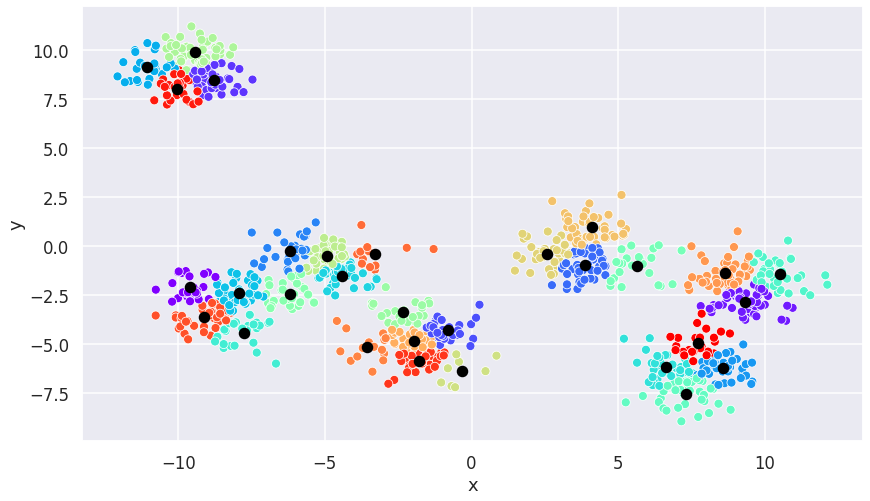

In [12]:
_, clusters_labels = train_and_plot(df, k=30)

In [13]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.35


#### Testes de plot com o índice
Pode ser muito útil ver um gráfico do índice variando pelo número de clusters

In [14]:
%%time

def do_silhouette_and_plot(data, max_clusters):
    min_clusters = 2

    clusters_range = range(min_clusters, max_clusters + 1)

    silhouettes = []
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)

    for k in clusters_range:
        model = KMeans(n_clusters=k, random_state=33)
        model.fit(data_copy)
        
        s = silhouette_score(data, model.labels_)
        silhouettes.append(s)
        
    _ = plt.plot(clusters_range, silhouettes, '-o')
    _ = plt.title('Silhouette x Número de Clusters')
    _ = plt.xlabel('Número de clusters')
    _ = plt.ylabel('Silhouette')
    _ = plt.xticks(clusters_range)
    plt.show()

CPU times: user 13 µs, sys: 3 µs, total: 16 µs
Wall time: 12.4 µs


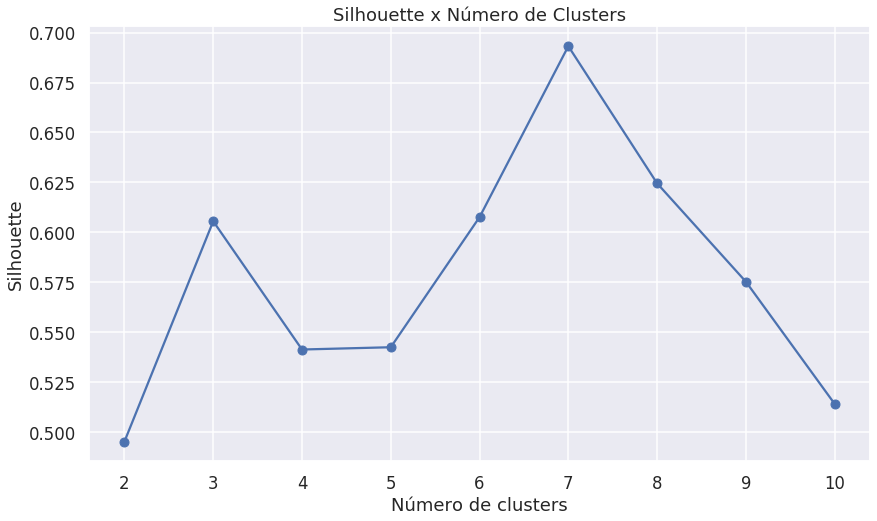

In [15]:
do_silhouette_and_plot(df, max_clusters=10)

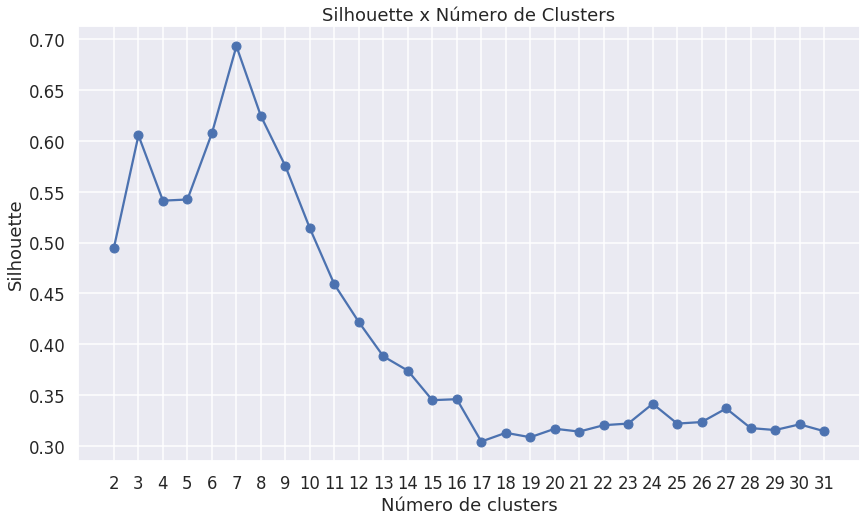

In [16]:
do_silhouette_and_plot(df, max_clusters=int(np.sqrt(len(df))))

## Algumas limitações
Resultados da avaliação de execuções onde o K-means é limitado.

In [17]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

,x,y,label
0,3.775776,-2.551136,4
1,4.798597,-1.459384,5
2,3.910070,1.590275,0
3,5.554648,1.009466,0
4,-10.997360,2.443557,6


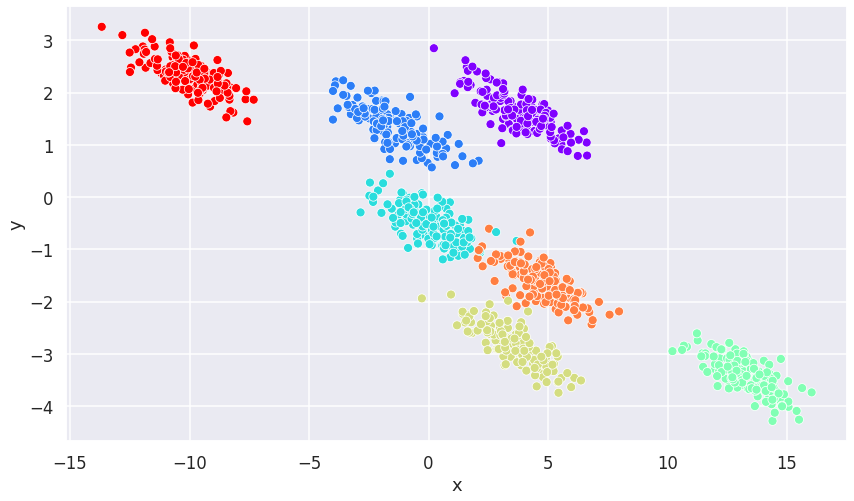

In [18]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

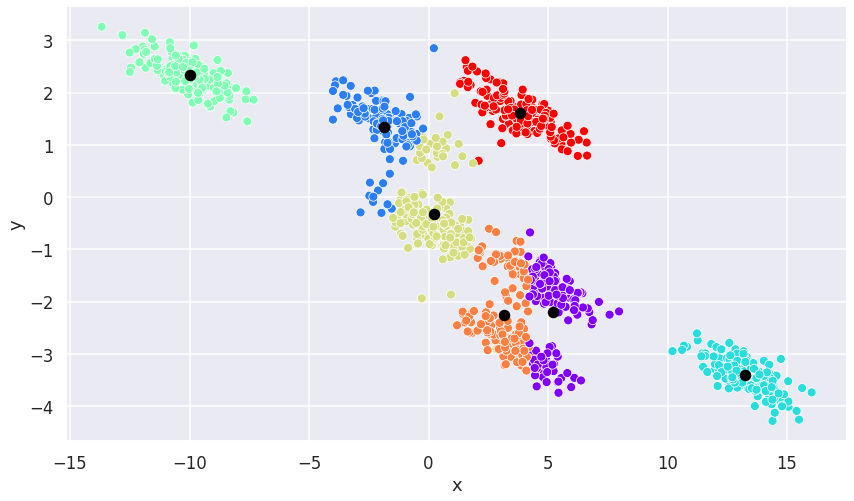

In [19]:
_, clusters_labels = train_and_plot(df_transformed, k=7)

In [20]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.51


### Avaliando em bases de dados com formatos diferentes de grupos

In [21]:
X, y = make_moons(300, noise=.05, random_state=33)

df_moon = pd.DataFrame(X, columns=['x', 'y'])
df_moon['label'] = y

df_moon.head()

,x,y,label
0,0.449533,-0.403077,1
1,1.860595,0.011092,1
2,1.842407,-0.086292,1
3,1.395956,-0.438878,1
4,0.479125,0.926415,0


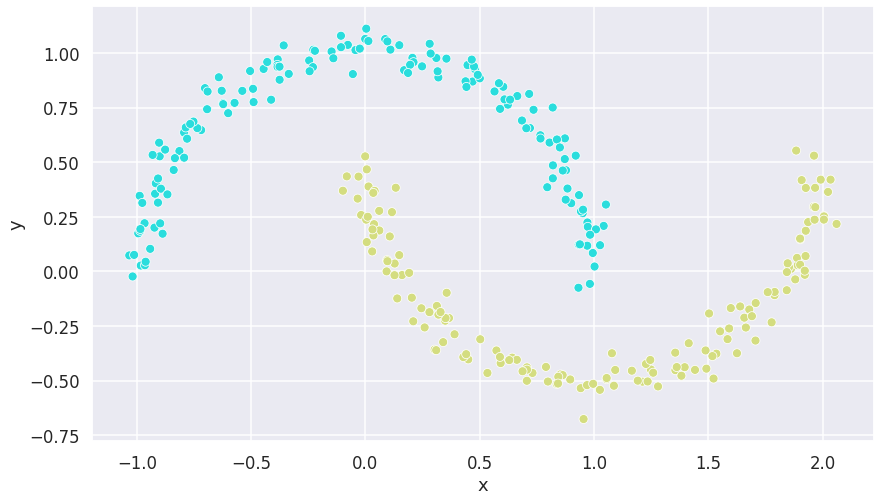

In [22]:
_ = sns.scatterplot(x='x', y='y', data=df_moon, hue='label', palette='rainbow', legend=False)

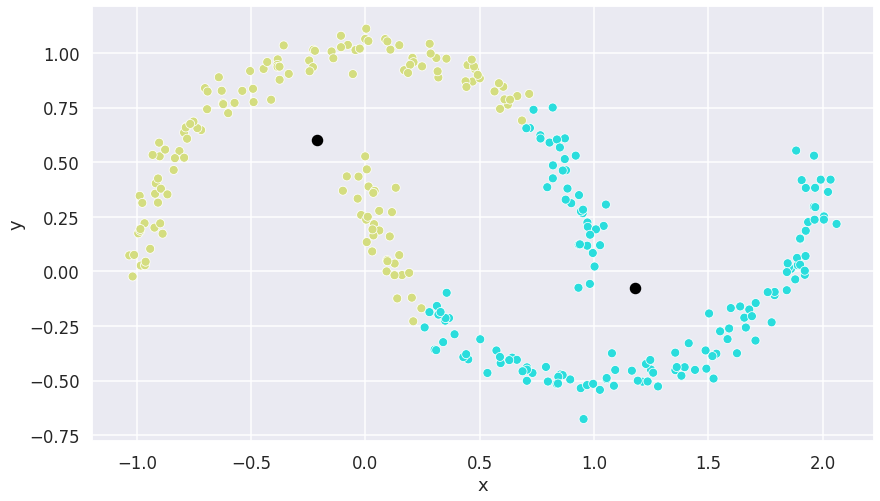

In [23]:
_, clusters_labels = train_and_plot(df_moon, k=2)

In [24]:
print('Silhouette Coefficient', round(silhouette_score(X, clusters_labels), 2))

Silhouette Coefficient 0.49


### Base de dados com ruído/aleatória

In [25]:
# Criamos uma base de dados com 1000 instâncias e duas features
random_data = np.random.rand(500, 2)

df_random = pd.DataFrame(random_data, columns=['x', 'y'])
df_random['label'] = None
df_random.head()

,x,y,label
0,0.693177,0.444783,None
1,0.069474,0.813314,None
2,0.959562,0.191573,None
3,0.007738,0.745848,None
4,0.892567,0.879727,None


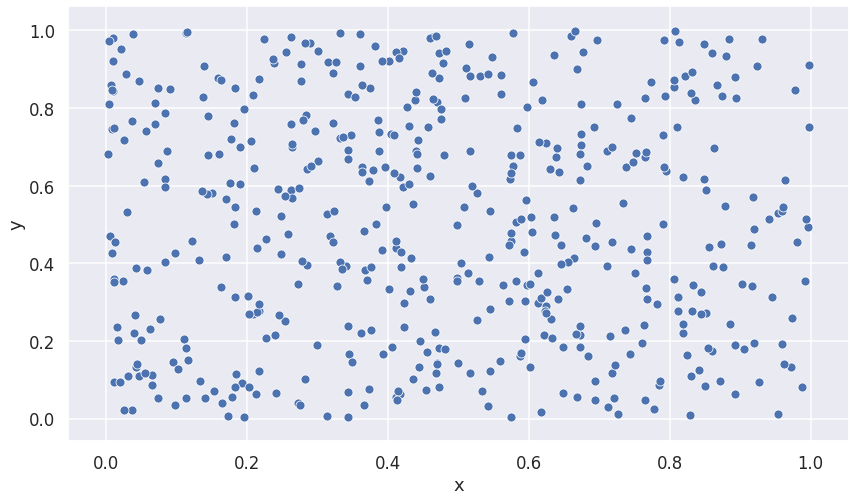

In [26]:
_ = sns.scatterplot(x='x', y='y', data=df_random, legend=False)

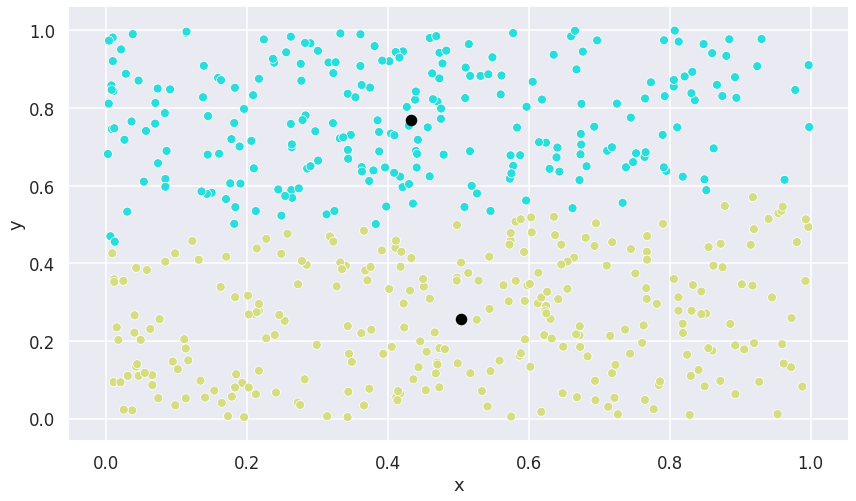

In [27]:
_, clusters_labels = train_and_plot(df_random, k=2)

In [28]:
print('Silhouette Coefficient', round(silhouette_score(random_data, clusters_labels), 2))

Silhouette Coefficient 0.38
